In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"./datasets/HospitalDatabase.xlsx",sheet_name=None)
edvisits=df['EDVisits']
ambulatoryvisits=df['AmbulatoryVisits']
providers=df['Providers']
patients=df['Patients']
edunique=df['EDUnique']
readmissionregistry=df['ReAdmissionRegistry']
discharges=df['Discharges']

# 1 .Visualization of Service wise ExpectedLOS using Seaborn Violinplot

<AxesSubplot:xlabel='ExpectedLOS', ylabel='Service'>

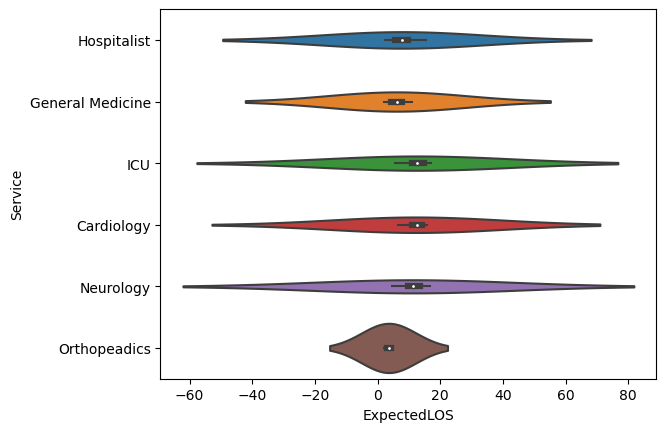

In [5]:
sns.violinplot(x='ExpectedLOS',y='Service',data=readmissionregistry,split=True,bw=10)

# 2. Histogram representation of DischargeDisposition for PatientID

<AxesSubplot:xlabel='PatientID', ylabel='Count'>

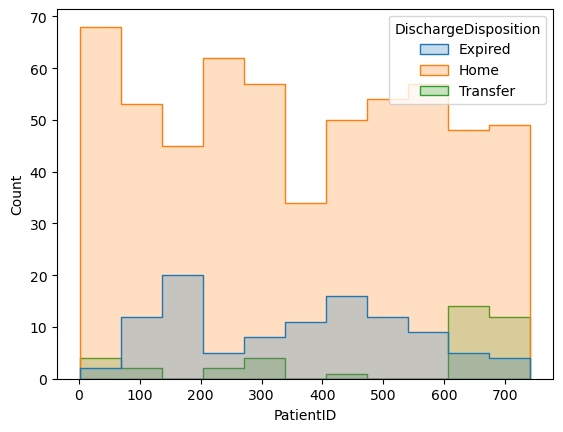

In [6]:
sns.histplot(data=discharges,x='PatientID',hue='DischargeDisposition',element='step')

# 3 Analysis on People with Severe Hypertention(BPS>180)(BPD>110) and high pulse rate of above 70

In [8]:
ambulatoryvisits[(ambulatoryvisits['BloodPressureSystolic']>=180)&(ambulatoryvisits['BloodPressureDiastolic']>110)&(ambulatoryvisits['Pulse']>70)]


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
38,506,890,15,2019-01-24,2019-01-21 05:07:43.641,10,Telemedicine,184.0,147.093192,71.160985,No Show
57,494,878,25,2019-01-12,2018-12-20 00:37:48.659,9,Follow Up,180.0,115.748552,92.200830,No Show
67,504,888,13,2019-01-22,2019-01-09 23:52:38.598,8,Telemedicine,185.0,154.745416,75.362150,No Show
70,509,893,2,2019-01-27,2019-01-26 05:11:07.934,5,Telemedicine,183.0,150.514924,78.979142,No Show
...,...,...,...,...,...,...,...,...,...,...,...
914,698,850,27,2019-03-07,2019-02-25 07:41:29.840,7,Follow Up,180.0,116.187225,93.596462,Canceled
922,483,867,15,2019-01-01,2018-12-04 12:16:32.105,6,New,186.0,140.252935,88.801153,Canceled
942,392,617,4,2019-02-03,2019-02-01 02:50:08.377,7,Telemedicine,185.0,127.419321,84.645360,Canceled
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled


# 4 analysis on Service based maximum ExpectedLOS and ExpectedMortality with visualization.

C:\Users\Gobinath\AppData\Local\Temp\ipykernel_6752\2210219804.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  service=readmissionregistry.groupby('Service')['ExpectedLOS','ExpectedMortality'].max()


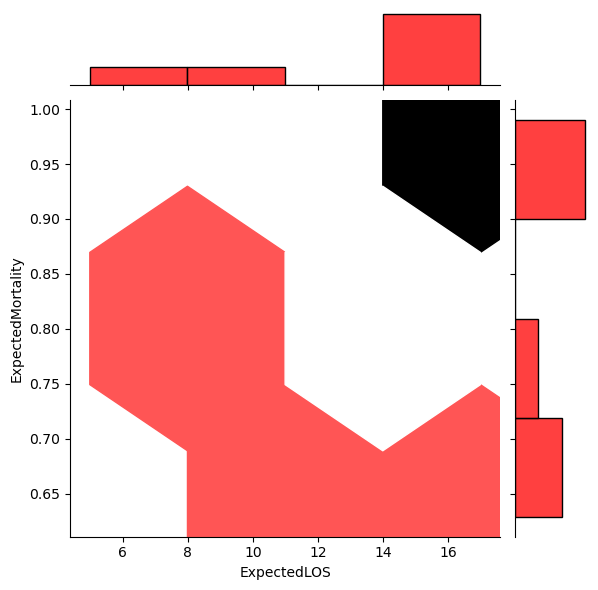

In [9]:
service=readmissionregistry.groupby('Service')['ExpectedLOS','ExpectedMortality'].max()
sns.jointplot(data=service,x='ExpectedLOS',y='ExpectedMortality',kind= 'hex',color='red')

# 5 Get details of patients gone home who has been diagnosised with pneumonia or flue.

In [3]:
# Merge the dataset
diagnosed_patients = pd.merge(discharges,patients, on = 'PatientID')

home_patients = diagnosed_patients[(diagnosed_patients['DischargeDisposition']=='Home') &
                ((diagnosed_patients['PrimaryDiagnosis']== 'Flu') | 
                (diagnosed_patients['PrimaryDiagnosis']=='Pneumonia'))]

In [4]:
patients_data = home_patients[['PatientID','FirstName','LastName','Gender','PrimaryDiagnosis','DischargeDisposition']]
patients_data

,PatientID,FirstName,LastName,Gender,PrimaryDiagnosis,DischargeDisposition
7,115,Zonnya,Frankton,Female,Pneumonia,Home
108,2,Far,Myers,Male,Flu,Home
109,3,Devlin,Michael,Male,Flu,Home
110,5,Tann,Bama,Male,Flu,Home
112,7,Skipton,Bar,Male,Pneumonia,Home
...,...,...,...,...,...,...
671,730,Hansen,Group,Male,Pneumonia,Home
676,737,Myrah,Hegley,Female,Pneumonia,Home
678,739,Chandal,Group,Female,Pneumonia,Home
679,740,Tiena,Mahomet,Female,Pneumonia,Home


# 6 Analysis of patients discharge with diagnosis

In [5]:
# diagnosed_patients created for previous question
# Create a contingency table of DischargeDisposition and PrimaryDiagnosis
table = pd.crosstab(diagnosed_patients['DischargeDisposition'], diagnosed_patients['PrimaryDiagnosis'])

# Display the contingency table
table

PrimaryDiagnosis,AMI,Afib,Broken Leg,Diabetes,Fever,Flu,Heart Failure,Hip Fracture,Hypertension,Kidney Failure,Knee Replacement,Laceration,Migraine,Pain,Pneumonia,Spinal Cord Injury,Stroke
DischargeDisposition,,,,,,,,,,,,,,,,,
Expired,6,4,3,9,4,11,16,3,16,2,2,2,0,1,16,2,7
Home,42,6,6,48,15,67,53,20,34,18,20,26,12,5,153,0,52
Transfer,0,1,0,7,0,2,9,0,0,0,1,1,0,1,8,0,9


# 7 Distribution of Gender, Race, and Language among Patients

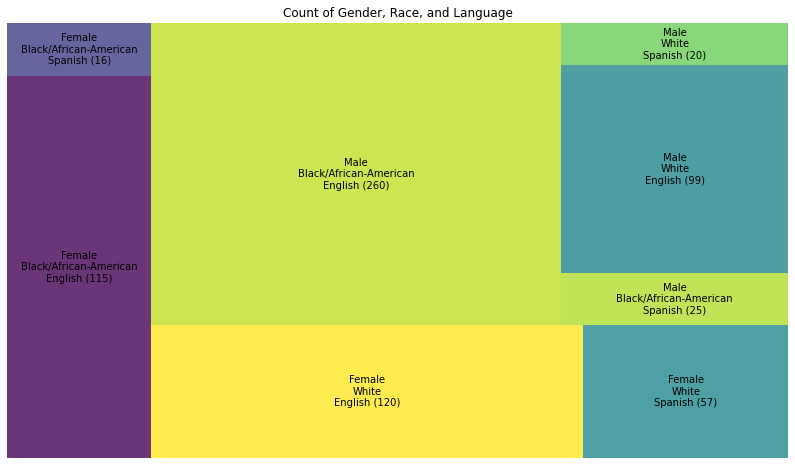

In [29]:
# diagnosed_patients created for previous question
# group the DataFrame by Gender, Race, and Language and count the occurrences

import squarify
grouped = diagnosed_patients.groupby(['Gender', 'Race', 'Language']).size().reset_index(name='Count')

# create a treemap using the counts
plt.figure(figsize=(14, 8))
squarify.plot(sizes=grouped['Count'], label=grouped.apply(lambda x: f"{x['Gender']}\n{x['Race']}\n{x['Language']} ({x['Count']})", axis=1), alpha=.8)

# add title and axis labels
plt.title("Count of Gender, Race, and Language")
plt.axis('off')

# display the chart
plt.show()

# 8 Blood Pressure Scatter Plot by Visit Type

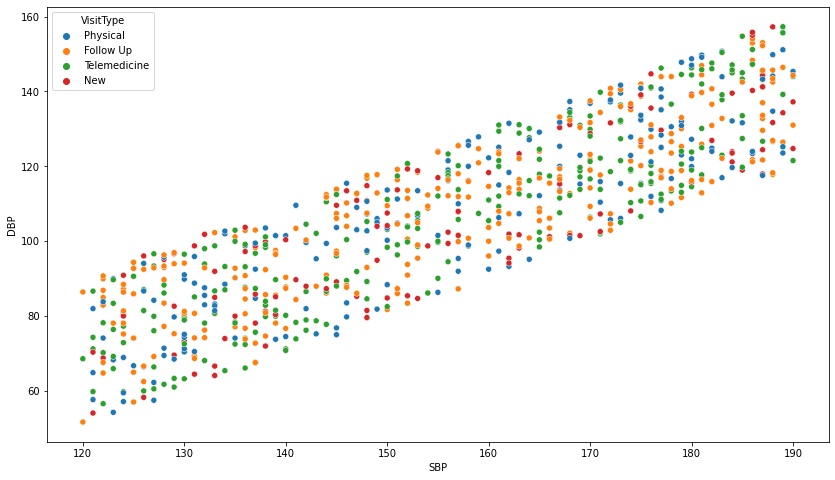

In [8]:
# Create scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=ambulatoryvisits, x='BloodPressureSystolic', y='BloodPressureDiastolic', hue='VisitType')

# Set axis labels
plt.xlabel('SBP')
plt.ylabel('DBP')

# Show the chart
plt.show()

# 9 List of reasons for each diagnosis, based on the patients' visits.

In [31]:
visit_diagnosis = pd.merge(edvisits, discharges, on = 'PatientID')
visit_reasons = visit_diagnosis.groupby('PrimaryDiagnosis')['ReasonForVisit'].agg(list).reset_index(name='ReasonsForVisit')
visit_reasons.head()

,PrimaryDiagnosis,ReasonsForVisit
0,AMI,"[Bleeding, Fever, Fever, Migraine, Shortness o..."
1,Afib,"[Chest Pain, Migraine, Pneumonia, Shortness of..."
2,Broken Leg,"[Migraine, Chest Pain, Pneumonia, Chest Pain, ..."
3,Diabetes,"[Pneumonia, Chest Pain, Stomach Ache, Shortnes..."
4,Fever,"[Pneumonia, Shortness of Breath, Pneumonia, Pn..."


# 10 Stacked Chart of reason for visit and primary diagnosis

In [10]:
data = visit_diagnosis.groupby(['ReasonForVisit','PrimaryDiagnosis']).size().reset_index(name='Count')
data

,ReasonForVisit,PrimaryDiagnosis,Count
0,Accident,AMI,1
1,Accident,Diabetes,3
2,Accident,Flu,3
3,Accident,Heart Failure,4
4,Accident,Hip Fracture,1
...,...,...,...
146,Stomach Ache,Laceration,5
147,Stomach Ache,Migraine,5
148,Stomach Ache,Pain,2
149,Stomach Ache,Pneumonia,37


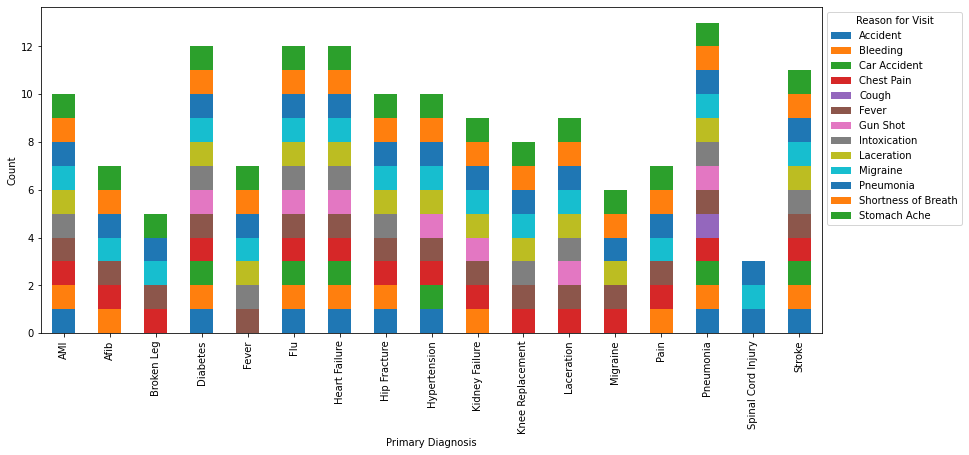

In [11]:
# Group the data by PrimaryDiagnosis and ReasonForVisit, and get the count
grouped_data = data.groupby(['PrimaryDiagnosis', 'ReasonForVisit']).size().reset_index(name='Count')

# Pivot the data to get ReasonForVisit categories as columns
pivoted_data = grouped_data.pivot(index='PrimaryDiagnosis', columns='ReasonForVisit', values='Count')

# Create the stacked bar chart
pivoted_data.plot(kind='bar',figsize = (14,6), stacked=True)

# Add axis labels and legend
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.legend(title='Reason for Visit',bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# 11 Display total count of primary diagnosis based on race

In [12]:
# merge two datas
race_diagnosis = pd.merge(patients,readmissionregistry,on = 'PatientID' )

# Group the data by race and primary diagnosis, and count the number of occurrences
count_by_race = race_diagnosis.groupby(['Race','PrimaryDiagnosis']).size().reset_index(name='Count')
count_by_race

,Race,PrimaryDiagnosis,Count
0,Black/African-American,AMI,26
1,Black/African-American,Afib,6
2,Black/African-American,Broken Leg,5
3,Black/African-American,Diabetes,38
4,Black/African-American,Fever,15
5,Black/African-American,Flu,40
6,Black/African-American,Heart Failure,42
7,Black/African-American,Hip Fracture,13
8,Black/African-American,Hypertension,33
9,Black/African-American,Kidney Failure,9


# 12 Grouped Bar Chart on total count of primary diagnosis based on race

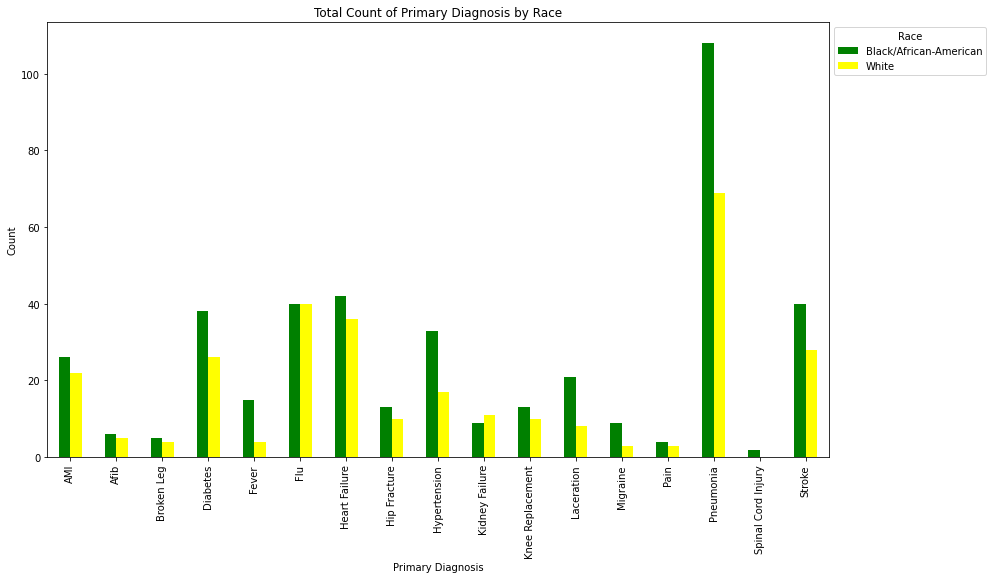

In [13]:
# Pivot the data to create a grouped bar chart
count_by_race_pivot = count_by_race.pivot(index='PrimaryDiagnosis', columns='Race', values='Count')

# Create the grouped bar chart
count_by_race_pivot.plot(kind='bar',figsize = (14,8), stacked=False,color = ['green', 'yellow'])

# Add chart labels and titles
plt.title('Total Count of Primary Diagnosis by Race')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count')
plt.legend(title='Race',bbox_to_anchor=(1, 1))

# Show the chart
plt.show()

# 13 Total count of type of visit for each provider 

In [14]:
provider_visit = pd.merge(providers,ambulatoryvisits,on = 'ProviderID' )
provider_visit.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,VisitID,PatientMRN,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,1,Sally Sue,Pediatrics,1993-01-01,710,862,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
1,1,Sally Sue,Pediatrics,1993-01-01,711,863,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
2,1,Sally Sue,Pediatrics,1993-01-01,508,892,2019-01-26,2018-12-30 13:19:44.630,12,Telemedicine,131.0,69.477003,66.336703,No Show
3,1,Sally Sue,Pediatrics,1993-01-01,215,853,2019-04-01,2019-03-04 06:48:53.527,11,Physical,129.0,79.762955,63.521310,No Show
4,1,Sally Sue,Pediatrics,1993-01-01,425,809,2019-03-08,2019-02-18 16:24:04.329,4,Follow Up,177.0,135.078967,96.159205,No Show


In [15]:
provider_visit_bytype = provider_visit.groupby(['ProviderName','VisitType']).size().reset_index(name='Count')
provider_visit_bytype.head()

,ProviderName,VisitType,Count
0,Abigail Marriot,Follow Up,10
1,Abigail Marriot,New,4
2,Abigail Marriot,Physical,4
3,Abigail Marriot,Telemedicine,11
4,Ala Bama,Follow Up,12


# 14 Show the graph of each provider on the basis of visit type and visit status

In [16]:
provider_visit_status = provider_visit.groupby(['ProviderName','VisitType','VisitStatus']).size().reset_index(name='Count')
provider_visit_status

,ProviderName,VisitType,VisitStatus,Count
0,Abigail Marriot,Follow Up,Completed,9
1,Abigail Marriot,Follow Up,No Show,1
2,Abigail Marriot,New,Canceled,1
3,Abigail Marriot,New,Completed,3
4,Abigail Marriot,Physical,Completed,4
...,...,...,...,...
267,Walter King,Follow Up,No Show,2
268,Walter King,New,Completed,2
269,Walter King,Physical,Completed,3
270,Walter King,Physical,No Show,3


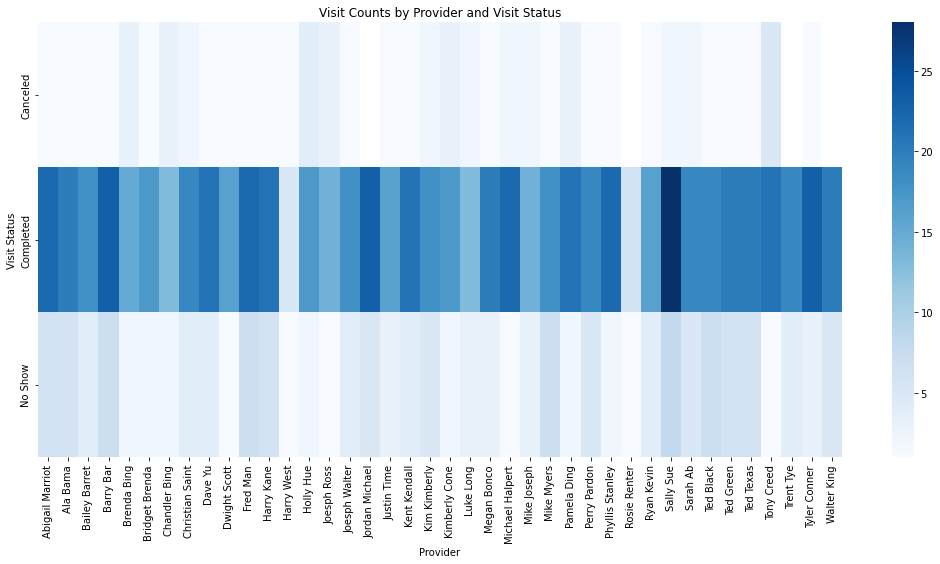

In [25]:
# Group data by provider and visit status
provider_visit_status = provider_visit.groupby(['ProviderName', 'VisitStatus']).size().reset_index(name='Count')

# Pivot the data to create a heatmap
heatmap_data = provider_visit_status.pivot(index='VisitStatus', columns='ProviderName', values='Count')
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap='Blues')

# Add chart title and axis labels
plt.title('Visit Counts by Provider and Visit Status')
plt.xlabel('Provider')
plt.ylabel('Visit Status')
plt.show()

# 15 Take user input as provider name and get number of visit type and visit status

In [28]:
provider_visit_status_type = provider_visit.groupby(['ProviderName','VisitType','VisitStatus']).size().reset_index(name='Count')

# Get user input for provider name
provider_name = input("Enter provider name: ")

# Filter data by provider name
provider_data = provider_visit_status_type[provider_visit_status_type['ProviderName'] == provider_name]

# Group by visit type and visit status and calculate total visits
visit_type_totals = provider_data.groupby('VisitType')['Count'].sum()
visit_status_totals = provider_data.groupby('VisitStatus')['Count'].sum()

# Print visit type and visit status totals
print(f"Visit Type Totals for {provider_name}:")
print(visit_type_totals)
print()
print(f"Visit Status Totals for {provider_name}:")
print(visit_status_totals)

Enter provider name: Tyler Conner
Visit Type Totals for Tyler Conner:
VisitType
Follow Up       12
New              3
Physical         5
Telemedicine     7
Name: Count, dtype: int64

Visit Status Totals for Tyler Conner:
VisitStatus
Canceled      1
Completed    23
No Show       3
Name: Count, dtype: int64


# 16 . Add column Age_category using bins in patient table

In [4]:
bins=[20,30,40,50,60,70,80]
patients['DateOfBirth']= pd.to_datetime(patients['DateOfBirth'])
patients['Age'] = (pd.to_datetime('today')- patients["DateOfBirth"]).astype('<m8[Y]').astype(int)
patients['age_bins']=pd.cut(patients['Age'],bins=bins,right=False)



,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,age_bins
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63,"[60, 70)"
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37,"[30, 40)"
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47,"[40, 50)"
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54,"[50, 60)"
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60,"[60, 70)"
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36,"[30, 40)"
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52,"[50, 60)"
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40,"[40, 50)"
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59,"[50, 60)"


# 17 which age group is mostly admitted in ICU

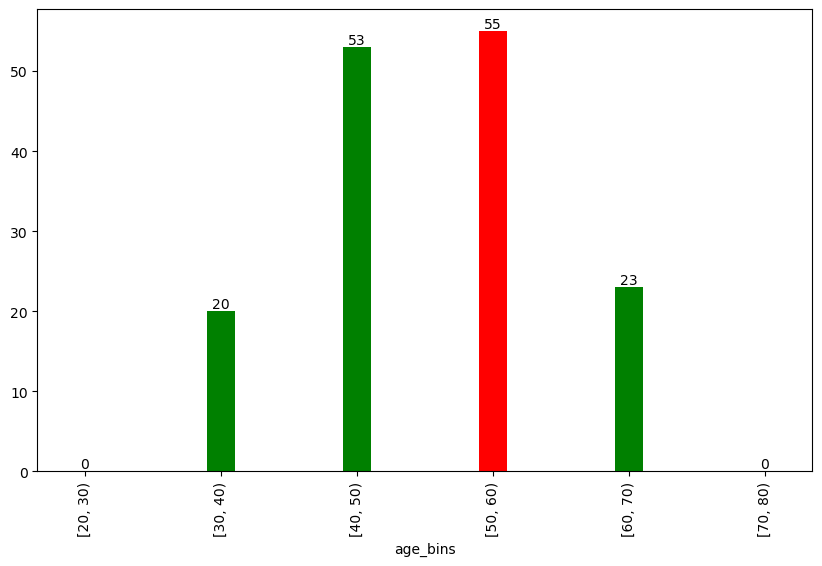

In [8]:
pat_read=pd.merge(patients,readmissionregistry,on='PatientID')
import matplotlib.pyplot as plt
pat_read1=pat_read.loc[pat_read.Service=='ICU'].groupby('age_bins')['PatientID'].count()
max_value = pat_read1.max()
colors = ['r' if x == max_value else 'g' for x in pat_read1]
ax = pat_read1.plot.bar(figsize=(10,6), width=0.2 , color = colors)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.show()


# 18 What is the actual length of stay of ICU admitted patients

In [12]:
readmissionregistry['ActualLOS']=(readmissionregistry['DischargeDate']-readmissionregistry['AdmissionDate']).dt.days
read=readmissionregistry.loc[readmissionregistry.Service=='ICU',['PatientID','ActualLOS']]
read

,PatientID,ActualLOS
4,6,4
8,10,6
31,27,11
45,40,7
64,59,5
...,...,...
703,725,5
707,730,9
710,733,11
714,737,13


# 19 From discharge table which service has maximum Expired rate

In [17]:
dis=discharges.loc[discharges.DischargeDisposition=='Expired'].groupby('Service')['PatientID'].count()
dis=dis.sort_values(ascending=False)
dis.head(1)

Service
ICU    29
Name: PatientID, dtype: int64

# 20  Find the count of English Speaking patients

In [4]:
patients[(patients['Language']=='English')].agg(count_Of_Patients=('PatientID','count'))

,PatientID
count_Of_Patients,827


# Q21 Plot a graph to show count of  male and femlae patients in our dataset

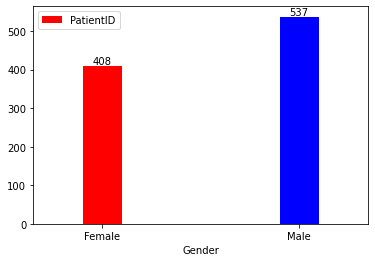

In [5]:
import matplotlib.pyplot as plt
patients1=patients.groupby('Gender')['PatientID'].count()
ax = patients1.plot.bar(figsize=(6,4), width=0.2,color=['r','b'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# 22 Time between scheduled visit and date of isit

In [38]:
# convert the date columns to datetime format
ambulatoryvisits['DateofVisit'] = pd.to_datetime(ambulatoryvisits['DateofVisit'])
ambulatoryvisits['DateScheduled'] = pd.to_datetime(ambulatoryvisits['DateScheduled'])

# calculate the time difference in days
ambulatoryvisits['time_between_visits'] = (ambulatoryvisits['DateofVisit'] - ambulatoryvisits['DateScheduled']).dt.days

# display the dataframe
ambulatoryvisits

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,time_between_visits
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show,5
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show,22
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show,13
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show,5
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show,23
...,...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled,16
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled,20
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled,7
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled,0


# 23 Data Analysis on Discharges sheet using Tableau and created visualizations

In [4]:
 %%HTML
    <div class='tableauPlaceholder' id='viz1681790181294' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;da&#47;datawranglers&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='datawranglers&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;da&#47;datawranglers&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681790181294');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
   

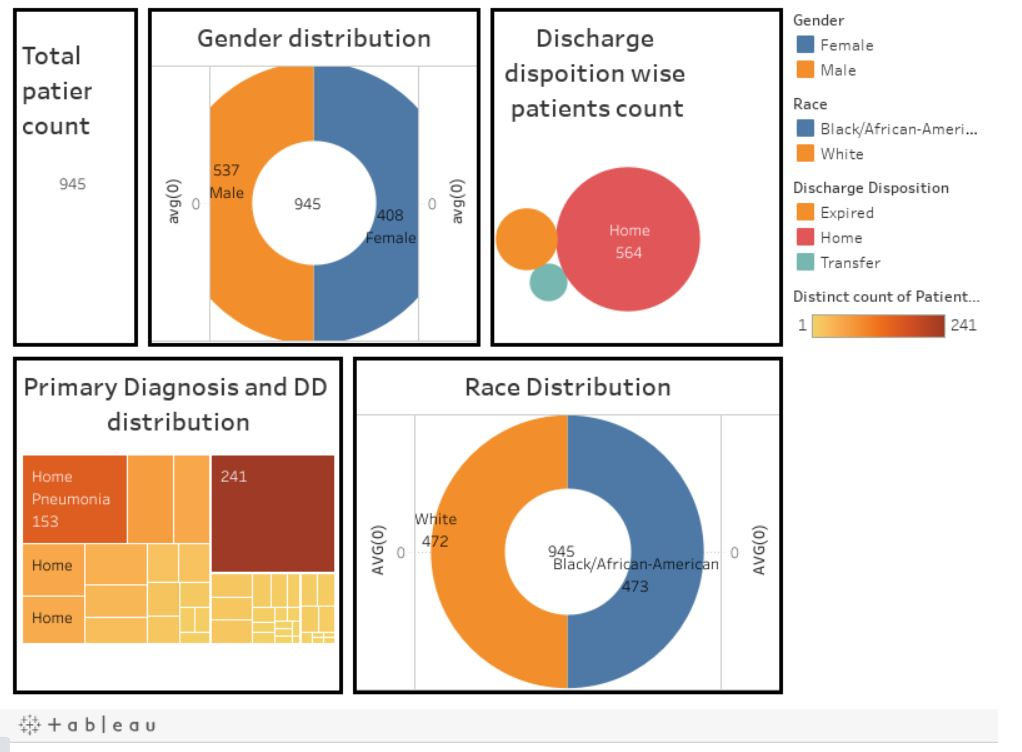

In [5]:
 from IPython import display
display.Image(r"./tabl.jpg")

# 24 Data Analysis on ReAdmissionRegistry sheet using Tableau and created visualizations

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1681835260593' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TableauAssignment3_16782308952510&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TableauAssignment3_16782308952510&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TableauAssignment3_16782308952510&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681835260593');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1500px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1500px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

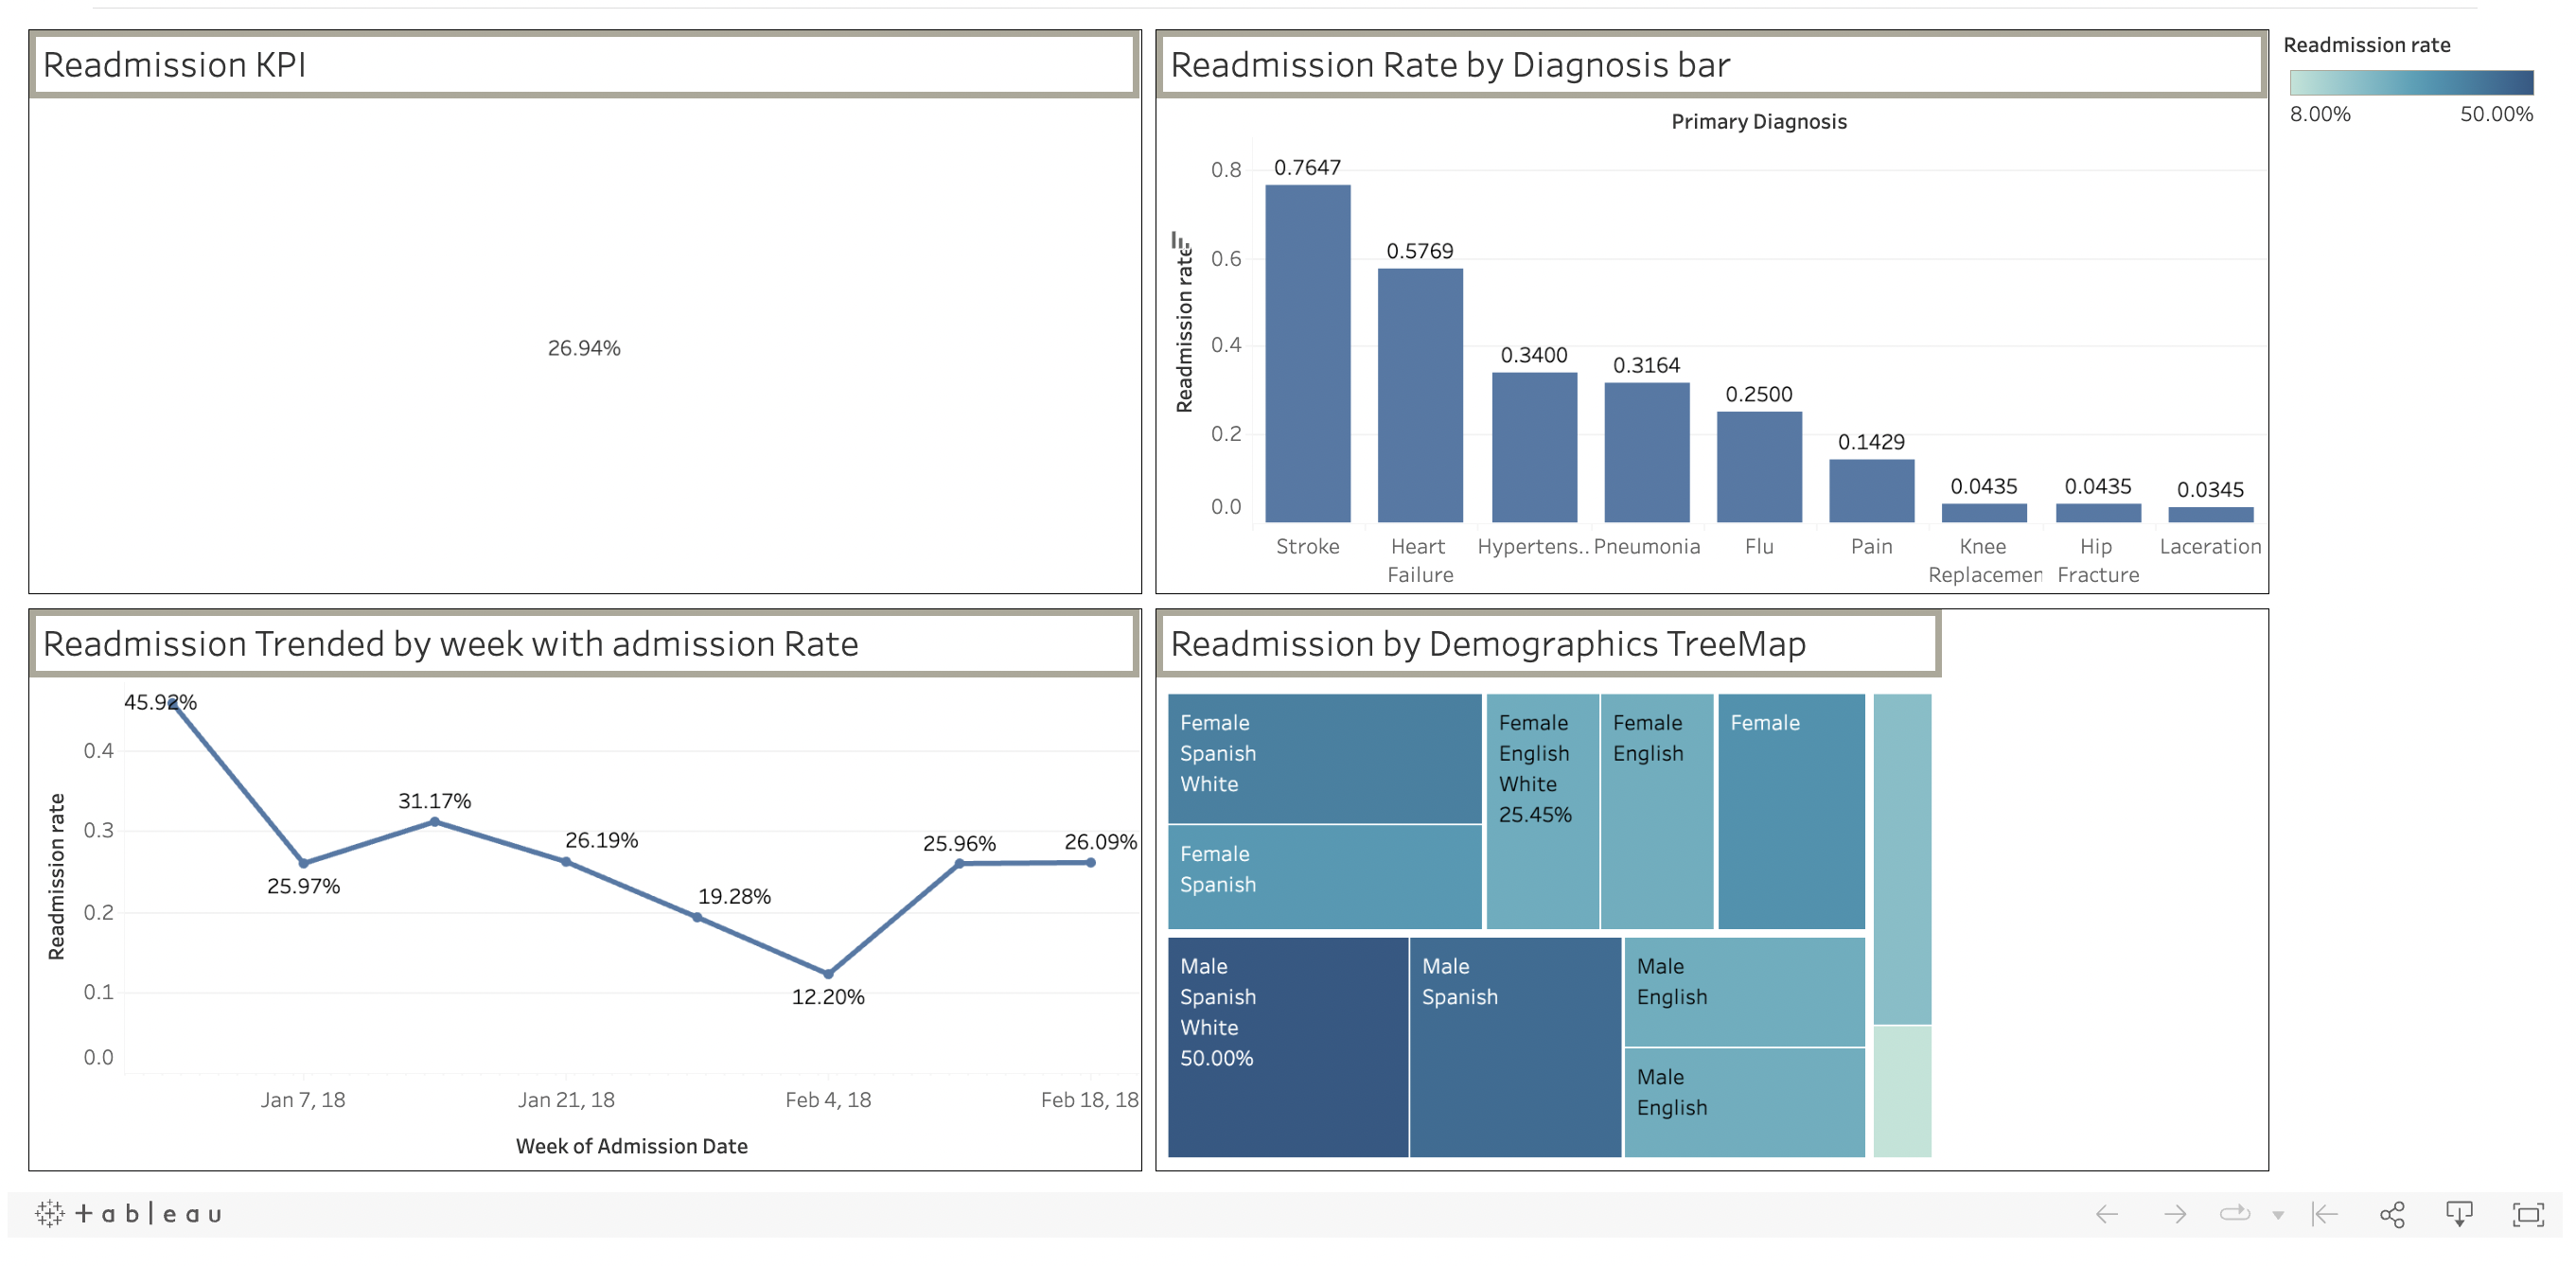

In [35]:
display.Image(r"./tabl1.png")

# 25  Data Analysis on EDVisists sheet using Tableau and created visualizations

In [33]:
%%HTML
<div class='tableauPlaceholder' id='viz1681840515090' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;As&#47;Assignment4_16771650440630&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Assignment4_16771650440630&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;As&#47;Assignment4_16771650440630&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681840515090');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1500px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1500px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1427px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

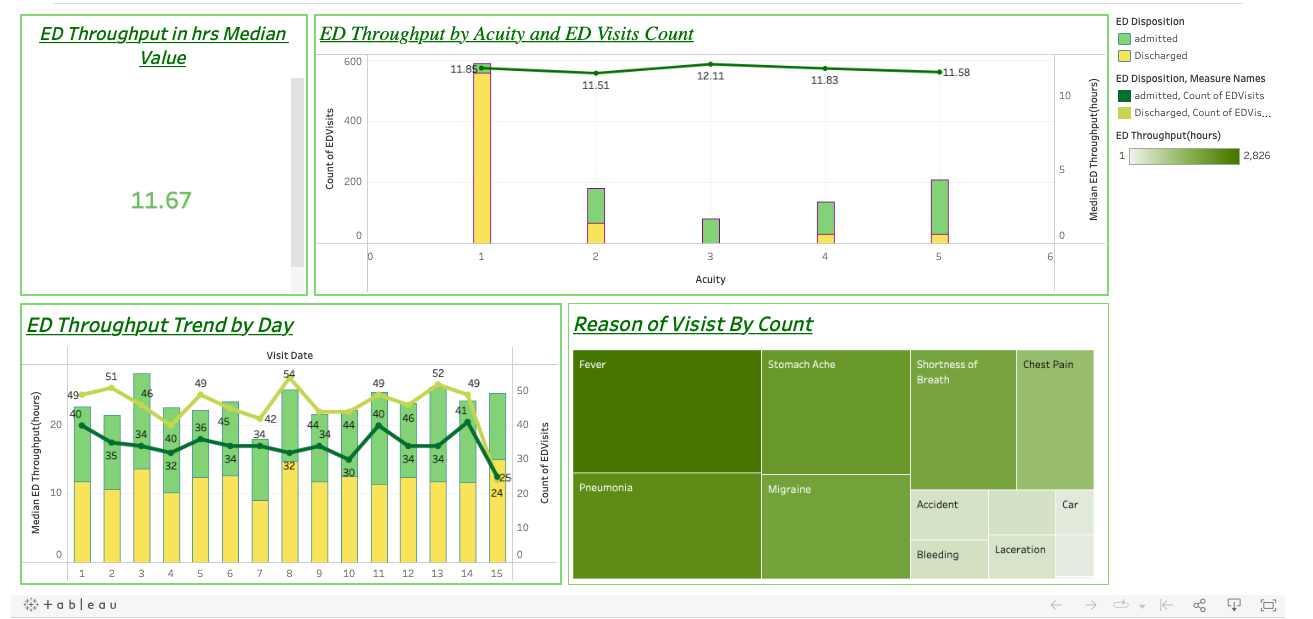

In [34]:
display.Image(r"./tabl2.png")

# 26 Data Analysis on AmbulatoryVisits sheet using Tableau and created visualizations

In [36]:
%%HTML
<div class='tableauPlaceholder' id='viz1681840609101' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;As&#47;Assignment6_16775588073720&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Assignment6_16775588073720&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;As&#47;Assignment6_16775588073720&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1681840609101');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='1200px';vizElement.style.maxWidth='1500px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

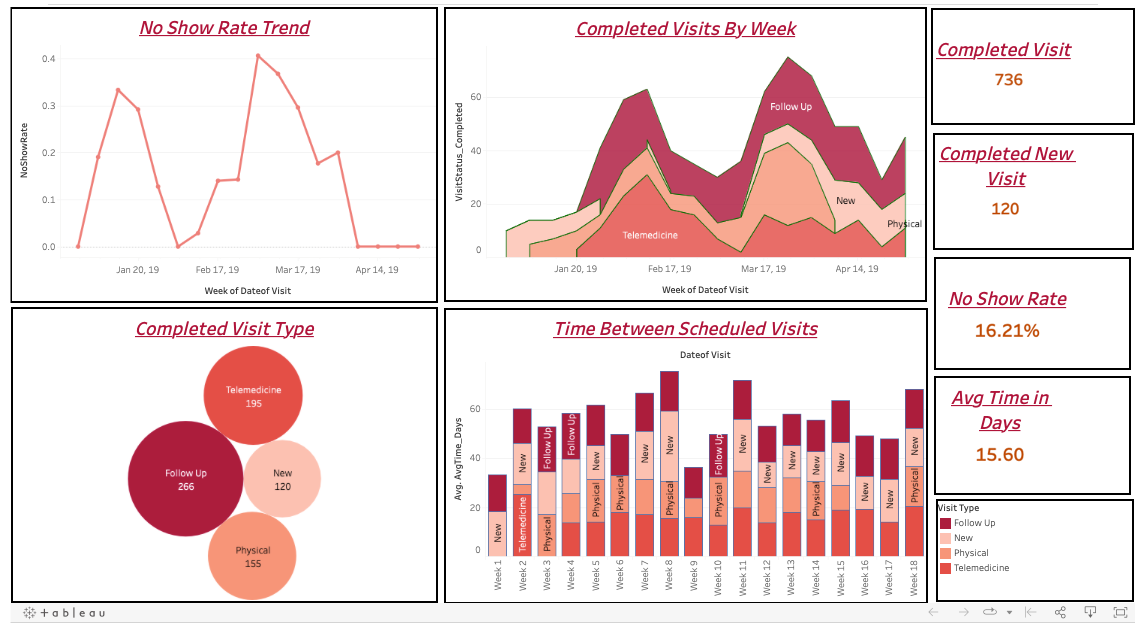

In [37]:
display.Image(r"./tabl3.png")